## Imports

In [1]:
#!pip install nest_asyncio
#!pip install networkx
#!pip install pandas
#!pip install matplotlib

In [2]:
from gremlin_python.process.anonymous_traversal import traversal
from gremlin_python.driver.driver_remote_connection import DriverRemoteConnection
from gremlin_python.driver import client, serializer
import pandas as pd
import matplotlib.pyplot as plt
import nest_asyncio
nest_asyncio.apply()

In [3]:
csv_path = "/home/smeet/Downloads/Bajaj Mall Data.csv"
tsv_path = "/home/smeet/Downloads/edgelist.txt"

# Sample Graph Creation

In [4]:
g = traversal().withRemote(DriverRemoteConnection('ws://localhost:8182/gremlin','g'))

In [5]:
query = g.V().drop()
query.iterate()

[['V'], ['drop'], ['none'], ['values', '_ipython_canary_method_should_not_exist_'], ['values', '_ipython_canary_method_should_not_exist_']]

In [6]:
# # Insert a new vertex
# new_vertex = g.addV('person').property('name', 'John').property('age', 30).next()

# # Insert another vertex
# another_vertex = g.addV('person').property('name', 'Alice').property('age', 25).next()

# # Insert an edge between the vertices
# g.V(new_vertex).addE('knows').to(g.V(another_vertex)).next()

Printing all nodes of the graph

In [7]:
# g.V().valueMap(True).toList()

In [8]:
all_vertices = g.V().valueMap(True).toList()

# Print the nodes and their properties
for vertex_properties in all_vertices:
    print(vertex_properties)

# Function to create a graph

In [9]:
def create_graph_node(label, properties):
    try:
        # Prepare the query to add a node
        query = g.addV(label)

        # Add properties to the node
        for key, value in properties.items():
            query = query.property(key, value)

        # Execute the query
        result_set = query.toList()
    finally:
        return result_set

In [10]:
# node_label = "person"
# node_properties = {
#     "name": "John",
#     "age": 30,
#     "city": "New York",
# }
# created_node = create_graph_node(node_label, node_properties)
# print("Created Node:", created_node)

In [11]:
def get_node_properties_by_id(node_id):
    result = "Pending"
    try:
        # Prepare the query to get the node by its ID
        query = g.V(node_id)

        # Execute the query and get the properties of the node
        result_set = query.valueMap(True).toList()

        if result_set:
            # The query returns a list of dictionaries with properties as keys and lists of values.
            # Since we queried for a single node, we extract the first element from the list.
            node_properties = result_set[0]
            result =  node_properties
        else:
            result = None

    finally:
        return result

In [12]:
# node_id = 16568

# node_properties = get_node_properties_by_id(node_id)
# if node_properties:
#     print("Properties of Node with ID", node_id, ":", node_properties)
# else:
#     print("Node with ID", node_id, "not found.")

# Create vertices from CSV

In [13]:
import csv

#file_path = "/home/smeet/Downloads/Bajaj Mall Data.csv"

# Open the CSV file in read mode
with open(csv_path, mode='r', newline='') as csvfile:
    # Create a CSV reader object
    csv_reader = csv.reader(csvfile)
    
    # Read and process each row in the CSV file
    for row in csv_reader:
        # 'row' will be a list representing each row in the CSV file
        # You can access individual elements in the row using their indexes
        id = row[0]
        name = row[1]
        category = row[2]
        price = row[3]
        rating = row[4]
        
        # Now you can do whatever you want with the data in the row
        #print(f"ID: {id}, Name: {name}, Category: {category}, Price: {price}, Rating: {rating}")
        
        node_label = "product"
        node_properties = {
            "id": id,
            "name": name,
            "category": category,
            "price":price,
            "rating":rating
        }
        created_node = create_graph_node(node_label, node_properties)
        print("Created Node:", created_node)

Created Node: [v[127160]]
Created Node: [v[114752]]
Created Node: [v[139360]]
Created Node: [v[143456]]
Created Node: [v[131256]]
Created Node: [v[118848]]
Created Node: [v[61544]]
Created Node: [v[57456]]
Created Node: [v[135352]]
Created Node: [v[122944]]
Created Node: [v[61552]]
Created Node: [v[24744]]
Created Node: [v[139448]]
Created Node: [v[143544]]
Created Node: [v[28840]]
Created Node: [v[127040]]
Created Node: [v[147552]]
Created Node: [v[32936]]
Created Node: [v[65648]]
Created Node: [v[151648]]
Created Node: [v[147640]]
Created Node: [v[131136]]
Created Node: [v[155744]]
Created Node: [v[69744]]
Created Node: [v[73840]]
Created Node: [v[151736]]
Created Node: [v[37032]]
Created Node: [v[159840]]
Created Node: [v[163936]]
Created Node: [v[135232]]
Created Node: [v[168032]]


In [14]:
all_vertices = g.V().valueMap(True).toList()

# Print the nodes and their properties
for vertex_properties in all_vertices:
    print(vertex_properties)

{<T.id: 1>: 114752, <T.label: 4>: 'product', 'name': ['Nilkamal Arthur Double Bed Without Storage (Walnut)'], 'price': ['13999'], 'rating': ['4.2'], 'id': ['0'], 'category': ['Beds']}
{<T.id: 1>: 118848, <T.label: 4>: 'product', 'name': ['Hometown Optimas King Bed With Box Storage (Dark Choco)'], 'price': ['20368'], 'rating': ['3.5'], 'id': ['4'], 'category': ['Beds']}
{<T.id: 1>: 122944, <T.label: 4>: 'product', 'name': ['Haier 195 L 3 Star Direct Cool Single Door Refrigerator Black Brushline (HRD-1953CKS-E)'], 'price': ['13499'], 'rating': ['2.1'], 'id': ['8'], 'category': ['Fridge']}
{<T.id: 1>: 127040, <T.label: 4>: 'product', 'name': ['LG 260 L 2 Star Frost Free Double Door Refrigerator Dazzle Steel (GL-N292BDSY)'], 'price': ['25500'], 'rating': ['2.3'], 'id': ['14'], 'category': ['Fridge']}
{<T.id: 1>: 131136, <T.label: 4>: 'product', 'name': ['vivo V27 Pro 5G 128 GB Storage Noble Black (8 GB RAM)'], 'price': ['37999'], 'rating': ['4.5'], 'id': ['20'], 'category': ['Smartphone']}

# Create edges from TSV

In [15]:
def add_edges_from_edgelist(edge_list):

    try:
        # Iterate through the edge list and add edges between existing nodes
        for source_id, edge_label, target_id in edge_list:
            query = graph.traversal().V(source_id).addE(edge_label).to(traversal_source).V(target_id)
            query.iterate()

    finally:
        # Close the connection to Gremlin Server
        graph.close()

In [16]:
# # Example edge list: (source_id, edge_label, target_id)
# edge_list = [
#     (1, 'knows', 2),
#     (2, 'likes', 3),
#     (1, 'works_with', 4),
#     # Add more edges as needed
# ]

# add_edges_from_edgelist(edge_list)

In [17]:
def create_edges_with_id(id1, id2, edge_label):
    try:
        # Get nodes with the specified property and their IDs
        n1 = g.V().has("id", id1).id().toList()[0]
        n2 = g.V().has("id", id2).id().toList()[0]
    
    
        #query = graph.traversal().V(n1).addE(edge_label).to(n1).V(n1)
        query = g.V(n1).addE(edge_label).to(g.V(n2))
    
        query.iterate()
    finally:
        return

In [18]:
create_edges_with_id(0, 7, "coPurchased_with")

In [19]:


# Open the TSV file in read mode, set the delimiter to '\t' for TSV
with open(tsv_path, mode='r', newline='') as tsvfile:
    # Create a CSV reader object with the specified delimiter
    tsv_reader = csv.reader(tsvfile, delimiter='\t')
    
    # Read and process each row in the TSV file
    for row in tsv_reader:
        if(len(row)<2): continue
        # 'row' will be a list representing each row in the TSV file
        # You can access individual elements in the row using their indexes
        id1 = int(row[0])
        id2 = int(row[1])
        
        # Now you can do whatever you want with the data in the row
        create_edges_with_id(id1, id2, "coPurchased_with")


In [20]:
g.V(110656).both().toList()

[]

# Graph Statistics

In [21]:
import psutil
import time

# Function to simulate some operation
def perform_operation():
    for _ in range(1000000):
        # Simulate a computation-intensive task
        result = 2 * 2
# Get memory usage in bytes before starting the operation
memory_before = psutil.virtual_memory().used

# Get CPU usage as a percentage before starting the operation
cpu_usage_before = psutil.cpu_percent(interval=None, percpu=False)

# Start the operation
start_time = time.time()
perform_operation()
end_time = time.time()

memory_after = psutil.virtual_memory().used
# Calculate the memory usage during the operation
memory_usage_during_operation = memory_after - memory_before

# Get CPU usage as a percentage after finishing the operation
cpu_usage_after = psutil.cpu_percent(interval=None, percpu=False)

# Calculate the CPU usage during the operation
cpu_usage_during_operation = cpu_usage_after - cpu_usage_before

# Calculate the time taken for the operation
operation_duration = end_time - start_time

print(f"Memory Usage Before: {memory_before/1000000} mb")
print(f"CPU Usage Before: {cpu_usage_before}%")
print(f"Memory Usage After: {memory_after/1000000} mb")
print(f"CPU Usage After: {cpu_usage_after}%")
print(f"Memory Usage During Operation: {memory_usage_during_operation/1000} kb")
print(f"CPU Usage During Operation: {cpu_usage_during_operation}%")
print(f"Operation Duration: {operation_duration:.4f} seconds")


Memory Usage Before: 6410.81344 mb
CPU Usage Before: 13.7%
Memory Usage After: 6411.046912 mb
CPU Usage After: 29.0%
Memory Usage During Operation: 233.472 kb
CPU Usage During Operation: 15.3%
Operation Duration: 0.0479 seconds


In [22]:
def generate_graph_statistics_report():
    try:
        # Query for the total number of vertices (nodes) in the graph
        total_vertices_query = g.V().count().toList()
        total_vertices = total_vertices_query[0]
    
        # Query for the total number of edges in the graph
        total_edges_query = g.E().count().toList()
        total_edges = total_edges_query[0]
    
        # Query for the average degree of the vertices in the graph
        sum_degree_query = g.V().bothE().count().toList()
        sum_degree = sum_degree_query[0]
    
        # # Query for the number of vertices per label (node type) in the graph
        # vertices_per_label_query = g.V().groupCount().by('coPurchased_with').toList()
        # vertices_per_label = {label: count for label, count in vertices_per_label_query[0].items()}
    
        # # Query for the number of edges per label in the graph
        # edges_per_label_query = g.E().groupCount().by('coPurchased_with').toList()
        # edges_per_label = {label: count for label, count in edges_per_label_query[0].items()}
    
        # Query for other statistics as needed...
    
        # Generate the report
        report = {
            "Total Vertices": total_vertices,
            "Total Edges": total_edges,
            "Average Degree": sum_degree/total_vertices,
        }

        return report

    finally:
        return report
        # Close the connection to Gremlin Server



In [23]:
graph_statistics_report = generate_graph_statistics_report()
print("Graph Statistics Report:")
for key, value in graph_statistics_report.items():
    print(f"{key}: {value}")

Graph Statistics Report:
Total Vertices: 31
Total Edges: 45
Average Degree: 2.903225806451613


# Graph Visualization

In [24]:
import networkx as nx
Graphtype = nx.DiGraph()
filepath = '/home/smeet/Downloads/edgelist.txt'
G = nx.read_edgelist(
    filepath,
    comments='#',
    create_using=Graphtype,
    nodetype=int
)

In [25]:
df = pd.read_csv("/home/smeet/Downloads/Bajaj Mall Data.csv")

In [26]:
nx.set_node_attributes(G, df[['NAME','CATEGORY', 'PRICE', 'AVGRATING']].to_dict('index'))

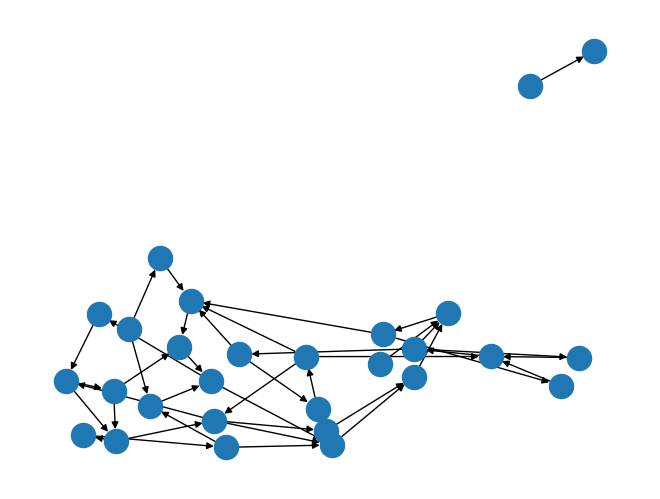

In [27]:
nx.draw(G)